In [0]:
#Description: this program uses an ANN called LSTM(Long short term memory) to predict the closing stock price of a corporation using the past 10 years stock price

In [3]:
#Importing libraries
import numpy as np
import pandas_datareader as web
import math
import pandas
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [11]:
#get the stock quote
df = web.DataReader('AAPL',data_source='yahoo',start='2010-01-01',end='2020-03-1')
#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2020-02-24,304.179993,289.230011,297.260010,298.179993,55548800.0,298.179993
2020-02-25,302.529999,286.130005,300.950012,288.079987,57668400.0,288.079987
2020-02-26,297.880005,286.500000,286.529999,292.649994,49513700.0,292.649994


In [8]:
#get the number of rows and columns in the dataset
df.shape

(2556, 6)

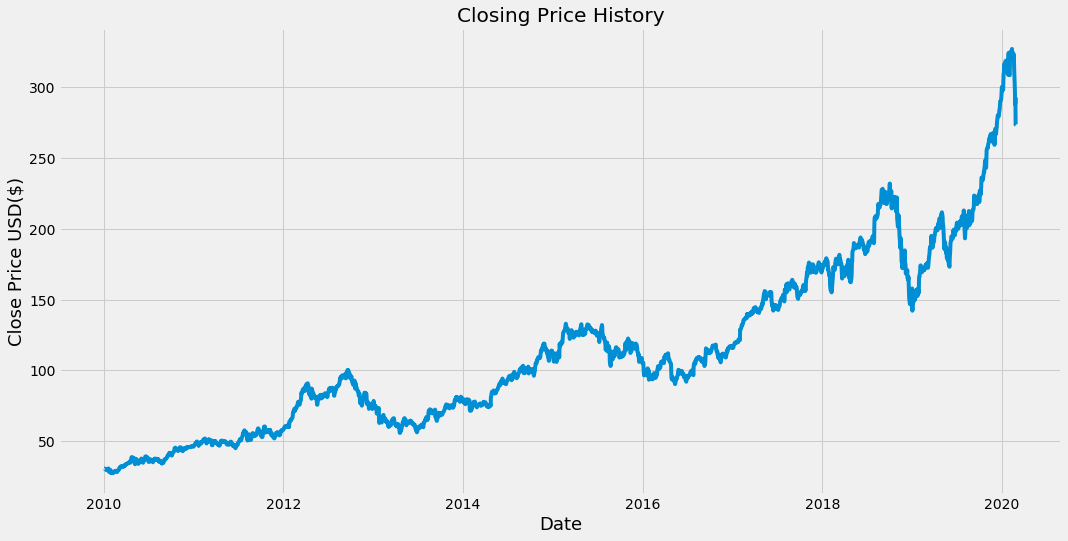

In [10]:
#Visualize the closing price
plt.figure(figsize = (16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [19]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
print("data is ",data)
#convert the dataframe into numpy array
dataset = data.values
print("Dataset is :",dataset)
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.80)
print("training data length is",training_data_len)


data is                   Close
Date                  
2010-01-04   30.572857
2010-01-05   30.625713
2010-01-06   30.138571
2010-01-07   30.082857
2010-01-08   30.282858
...                ...
2020-02-24  298.179993
2020-02-25  288.079987
2020-02-26  292.649994
2020-02-27  273.519989
2020-02-28  273.359985

[2556 rows x 1 columns]
Dataset is : [[ 30.5728569 ]
 [ 30.62571335]
 [ 30.13857079]
 ...
 [292.6499939 ]
 [273.51998901]
 [273.35998535]]
training data length is 2045


In [20]:
#Preprocessing
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.88474272],
       [0.8209259 ],
       [0.82039213]])

In [21]:
#Create the training data set
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
len(train_data)

2045

In [24]:
train_data

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.45670643],
       [0.46681437],
       [0.48556246]])

In [35]:
#Split the data into x train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([1.04653630e-02, 1.06416897e-02, 9.01660433e-03, 8.83074613e-03,
       9.49793954e-03, 8.60676186e-03, 7.46777113e-03, 8.86410644e-03,
       8.28269668e-03, 6.61471952e-03, 1.09562233e-02, 9.37879559e-03,
       7.63456630e-03, 2.71641848e-03, 5.25174452e-03, 6.61948528e-03,
       7.54402326e-03, 3.45032614e-03, 4.76575809e-06, 1.27719135e-03,
       1.81570929e-03, 3.42173159e-03, 0.00000000e+00, 1.62508533e-03,
       9.86486473e-04, 1.97297931e-03, 1.46305592e-03, 3.15485550e-03,
       3.96978105e-03, 5.40900818e-03, 5.00393146e-03, 5.18502391e-03,
       4.58455111e-03, 3.98884408e-03, 2.38758754e-03, 4.10322227e-03,
       4.74182113e-03, 5.99041794e-03, 8.07300968e-03, 8.00628907e-03,
       8.23503910e-03, 8.89270099e-03, 1.28195966e-02, 1.28815451e-02,
       1.47592156e-02, 1.56265581e-02, 1.59410981e-02, 1.64653188e-02,
       1.51499950e-02, 1.54406999e-02, 1.52834362e-02, 1.55360151e-02,
       1.43922586e-02, 1.55836726e-02, 1.73040668e-02, 1.77854020e-02,
     

In [36]:
print(np.shape(x_train))
print(np.shape(y_train))

(1985, 60)
(1985,)


In [0]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [38]:
x_train.shape

(1985, 60)

In [39]:
#Reshape the data bcoz our LSTM model is expecting 3D data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1985, 60, 1)

In [44]:
#Build the model
model =   Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [45]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [46]:
#Fitting the model
model.fit(x_train,y_train,batch_size=30,epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





1985/1985 [==============================] - 21s 11ms/step - loss: 0.0040
Epoch 2/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.3223e-04
Epoch 3/20
1985/1985 [==============================] - 12s 6ms/step - loss: 1.2313e-04
Epoch 4/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.2326e-04
Epoch 5/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.2056e-04
Epoch 6/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.2785e-04
Epoch 7/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.1199e-04
Epoch 8/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.0838e-04
Epoch 9/20
1985/1985 [==============================] - 11s 6ms/step - loss: 1.0902e-04
Epoch 10/20
1985/1985 [==============================] - 11s 5ms/step - loss: 1.0351e-04
Epoch 11/20
1985/198

In [0]:
#Create the testing dataset
#Create a new array containing scaled values from index 1985 to 2045
test_data = scaled_data[training_data_len - 60:,:]
#Create the x_tests and y_tests
x_test = []
y_test = dataset[training_data_len : , :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [49]:
#convert the data  into numpy array
x_test = np.array(x_test)
x_test.shape

(511, 60)

In [51]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(511, 60, 1)

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [53]:
#Get the root mean square error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.53131231916394

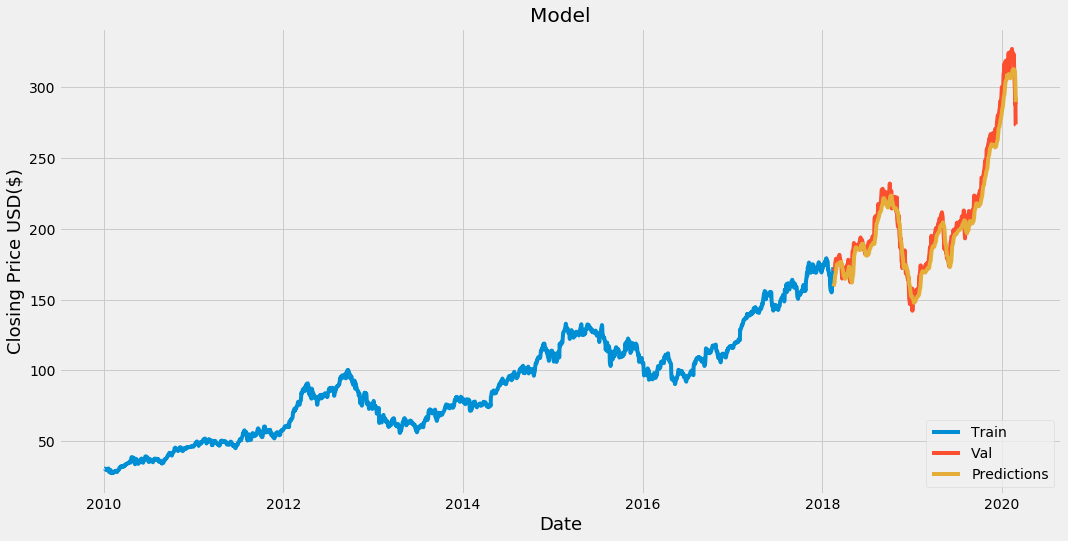

In [55]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [57]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2018-02-16,172.429993,159.376602
2018-02-20,171.850006,161.760559
2018-02-21,171.070007,164.054047
2018-02-22,172.500000,165.979141
2018-02-23,175.500000,167.639496
...,...,...
2020-02-24,298.179993,311.278442
2020-02-25,288.079987,307.744537
2020-02-26,292.649994,302.239960


In [0]:
#Get the quote
apple_quote = web.datareader('AAPL',data_source='yahoo',start='2010-01-01',end='2021-03-01')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days =  new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [0]:
#actual price
apple_quote2 = web.datareader('AAPL',data_source='yahoo',start='2010-01-01',end='2021-03-01')
print(apple_quote2)